In [1]:
from Assemblies.game import GameField
import numpy as np

from fractions import Fraction

%matplotlib inline
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

In [2]:
def string_field(field):
    """Poor-man's viz of the game field."""
    s_rows = ["".join(str(row)[1:-1].split()) for row in field]
    return "\n".join(s_rows)


def round_float(value):
    return np.array([value])

In [3]:
def coop_density(field):
    """Cooperator is zero, defector is 1."""
    return 1. - np.count_nonzero(field) / field.size

In [4]:
"""Candidate fractions (num & den <= 7)."""
all_fracs = set()
for den in range(1, 7+1):
    for num in range(1, 7+1):
        all_fracs.add(Fraction(num, den))
fracs = [f for f in all_fracs if 1 < f < 3]
fracs = sorted(list(fracs))
fracs

[Fraction(7, 6),
 Fraction(6, 5),
 Fraction(5, 4),
 Fraction(4, 3),
 Fraction(7, 5),
 Fraction(3, 2),
 Fraction(5, 3),
 Fraction(7, 4),
 Fraction(2, 1),
 Fraction(7, 3),
 Fraction(5, 2)]

In [ ]:
L = 90
percentage = 0.1

NUM_STEPS = 10000

In [ ]:
#### HERE density is density of DEFECTORS (unlike below)

runs = []

for frac in fracs:
    for delta in [-1, 1]:
        b = float(frac) + delta*1e-3
        
        # init
        rndm = np.random.RandomState(12345)
        instance = (rndm.uniform(size=(L, L)) > percentage).astype(int)
        game = GameField(L, b)
        game.field = instance
        
        this_density = coop_density(game.field)
        this_run = {"frac": frac,
                    "b": b,
                    "density": [this_density],
                    "field": [game.field]}    
        print("frac =", frac, "+" if delta>0 else "-", "  :  density = ", round(this_density, 3), end=" ")
        
        for _ in range(9):
            game.evolveT(NUM_STEPS)
            this_run["field"].append(game.field)
            
            this_density = coop_density(game.field)
            this_run["density"].append(this_density)
            print(round(this_density, 3), end=", ")
        
        runs.append(this_run)
        print()

In [ ]:
Fraction(3, 4) + 0.1

In [ ]:
g = GameField(33, 3/4)

In [ ]:
g.field[11, 11:15] = 1

In [5]:
def run_runs(L, fracs, fraction_D, num_steps, seed=12345):
    runs = []
    for frac in fracs:
        for delta in [-1, 1]:
            b = float(frac) + delta*1e-3

            # init
            rndm = np.random.RandomState(seed)
            instance = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
            game = GameField(L, b)
            game.field = instance

            this_density = coop_density(game.field)
            this_run = {"frac": frac,
                        "b": b,
                        "coop_density": [this_density],
                        "field": [game.field]}    
            print("frac =", frac, "+" if delta>0 else "-", "  :  density C = ", round(this_density, 3), end=" ")

            for _ in range(7):
                game.evolveT(num_steps)
                this_run["field"].append(game.field)

                this_density = coop_density(game.field)
                this_run["coop_density"].append(this_density)
                print(round(this_density, 3), end=", ")

            runs.append(this_run)
            print()
    return runs

In [ ]:
results = run_runs(L=60, fracs=fracs, fraction_D=0.1, num_steps=1000)

In [ ]:
fracs

In [6]:
repl_runs = {}
for r in range(3):
    seed = 12345 + r
    print(">>>>> seed = ", seed)
    repl_runs[seed] = run_runs(L=60, fracs=fracs, fraction_D=0.1, num_steps=1000, seed=seed)

>>>>> seed =  12345
frac = 7/6 -   :  density C =  0.906 0.969, 0.969, 0.969, 0.969, 0.969, 0.969, 0.969, 
frac = 7/6 +   :  density C =  0.906 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 
frac = 6/5 -   :  density C =  0.906 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 
frac = 6/5 +   :  density C =  0.906 0.934, 0.934, 0.934, 0.934, 0.934, 0.934, 0.934, 
frac = 5/4 -   :  density C =  0.906 0.934, 0.934, 0.934, 0.934, 0.934, 0.934, 0.934, 
frac = 5/4 +   :  density C =  0.906 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 
frac = 4/3 -   :  density C =  0.906 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 
frac = 4/3 +   :  density C =  0.906 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 
frac = 7/5 -   :  density C =  0.906 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 
frac = 7/5 +   :  density C =  0.906 0.879, 0.883, 0.884, 0.879, 0.883, 0.884, 0.879, 
frac = 3/2 -   :  density C =  0.906 0.879, 0.883, 0.884, 0.879, 0.883, 0.884, 0.879, 
frac = 3/2 +   :  densi

In [10]:
for r in range(5):
    seed = 123 + r
    print(">>>>> seed = ", seed)
    repl_runs[seed] = run_runs(L=60, fracs=fracs, fraction_D=0.1, num_steps=1000, seed=seed)

>>>>> seed =  123
frac = 7/6 -   :  density C =  0.896 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 
frac = 7/6 +   :  density C =  0.896 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 
frac = 6/5 -   :  density C =  0.896 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 
frac = 6/5 +   :  density C =  0.896 0.922, 0.923, 0.923, 0.922, 0.923, 0.923, 0.922, 
frac = 5/4 -   :  density C =  0.896 0.922, 0.923, 0.923, 0.922, 0.923, 0.923, 0.922, 
frac = 5/4 +   :  density C =  0.896 0.895, 0.895, 0.895, 0.895, 0.895, 0.895, 0.895, 
frac = 4/3 -   :  density C =  0.896 0.895, 0.895, 0.895, 0.895, 0.895, 0.895, 0.895, 
frac = 4/3 +   :  density C =  0.896 0.899, 0.899, 0.899, 0.899, 0.899, 0.899, 0.899, 
frac = 7/5 -   :  density C =  0.896 0.899, 0.899, 0.899, 0.899, 0.899, 0.899, 0.899, 
frac = 7/5 +   :  density C =  0.896 0.845, 0.853, 0.854, 0.845, 0.853, 0.854, 0.845, 
frac = 3/2 -   :  density C =  0.896 0.845, 0.853, 0.854, 0.845, 0.853, 0.854, 0.845, 
frac = 3/2 +   :  density

frac = 4/3 -   :  density C =  0.899 0.899, 0.899, 0.899, 0.899, 0.899, 0.899, 0.899, 
frac = 4/3 +   :  density C =  0.899 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 
frac = 7/5 -   :  density C =  0.899 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 
frac = 7/5 +   :  density C =  0.899 0.861, 0.858, 0.86, 0.861, 0.858, 0.86, 0.861, 
frac = 3/2 -   :  density C =  0.899 0.861, 0.858, 0.86, 0.861, 0.858, 0.86, 0.861, 
frac = 3/2 +   :  density C =  0.899 0.84, 0.839, 0.837, 0.84, 0.839, 0.837, 0.84, 
frac = 5/3 -   :  density C =  0.899 0.84, 0.839, 0.837, 0.84, 0.839, 0.837, 0.84, 
frac = 5/3 +   :  density C =  0.899 0.794, 0.788, 0.799, 0.794, 0.788, 0.799, 0.794, 
frac = 7/4 -   :  density C =  0.899 0.794, 0.788, 0.799, 0.794, 0.788, 0.799, 0.794, 
frac = 7/4 +   :  density C =  0.899 0.903, 0.969, 0.963, 0.967, 0.969, 0.963, 0.967, 
frac = 2 -   :  density C =  0.899 0.903, 0.969, 0.963, 0.967, 0.969, 0.963, 0.967, 
frac = 2 +   :  density C =  0.899 0.588, 0.584, 0.589, 0.588, 0.588,

In [49]:
import pickle
with open("runs_L60perc10numsteps1000.pckl", "wb") as f:
    pickle.dump(repl_runs, f)

In [ ]:
with open("runs_L60perc10numsteps1000.pckl", "rb") as f:
    unp = pickle.load(f)

## D is zero C is 1, or the other way around?

Square grid: The density of $\mathcal C$ is $\approx 0.32$ for $1.8 < b < 2$


Code: 1 means $\mathcal{D}$

In [ ]:
LQ = 50

dens = []
for replica in range(10):
    rndm = np.random.RandomState(12345+replica)
    instance = (rndm.uniform(size=(LQ, LQ)) < 0.1).astype(int)
    game = GameField(L=LQ, b=1.82)
    game.field = instance
    this_dens = []
    for step in range(10):
        game.evolveQ(1000)
        this_dens += [1 - np.count_nonzero(game.field) / LQ**2]
    dens += this_dens

In [ ]:
dens

# Analyze `repl_runs`

In [11]:
dens_map = dict()
for seed in repl_runs:
    # smth happened to this seed, WTF?
    if seed == 12352:
        continue
    for run in repl_runs[seed]:
        b = run["b"]
        if b not in dens_map:
            dens_map[b] = run["coop_density"][1:]
        else:
            dens_map[b] += run["coop_density"][1:]

In [13]:
dens_map.keys()

dict_keys([1.749, 2.001, 1.249, 1.499, 1.251, 1.501, 2.3343333333333334, 1.6676666666666666, 2.501, 1.2009999999999998, 1.3323333333333334, 1.3343333333333331, 1.4009999999999998, 1.999, 2.3323333333333336, 2.499, 1.399, 1.6656666666666669, 1.1676666666666666, 1.199, 1.751, 1.1656666666666669])

In [14]:
bs = set()
for seed in repl_runs:
    for r in repl_runs[seed]:
        b = r["b"]
        bs.add(b)

In [15]:
seeds = [seed for seed in repl_runs]
seeds

[12347, 12345, 12346, 123, 124, 125, 126, 127]

In [16]:
bs, coop_dens, err_coop_dens = [], [], []
for b in sorted(dens_map):
    print(b, end=" : ")
    c_dens_av = np.mean(dens_map[b])
    c_dens_err = np.std(dens_map[b])
    bs.append(b)
    coop_dens.append(c_dens_av)
    err_coop_dens.append(c_dens_err)
    print(c_dens_av, c_dens_err)

1.1656666666666669 : 0.971701388889 0.00237511167704
1.1676666666666666 : 0.916979166667 0.011471951083
1.199 : 0.916979166667 0.011471951083
1.2009999999999998 : 0.929766865079 0.00527432447218
1.249 : 0.929766865079 0.00527432447218
1.251 : 0.893680555556 0.00739868554809
1.3323333333333334 : 0.893680555556 0.00739868554809
1.3343333333333331 : 0.893715277778 0.00750689764019
1.399 : 0.893715277778 0.00750689764019
1.4009999999999998 : 0.868050595238 0.0102972642211
1.499 : 0.868050595238 0.0102972642211
1.501 : 0.847063492063 0.00766371455536
1.6656666666666669 : 0.847063492063 0.00766371455536
1.6676666666666666 : 0.779221230159 0.00903638473151
1.749 : 0.779221230159 0.00903638473151
1.751 : 0.947048611111 0.0409516548627
1.999 : 0.947048611111 0.0409516548627
2.001 : 0.563273809524 0.0155490627647
2.3323333333333336 : 0.563273809524 0.0155490627647
2.3343333333333334 : 0.0138194444444 0.00749471631933
2.499 : 0.0138194444444 0.00749471631933
2.501 : 0.000243055555556 0.0006430645

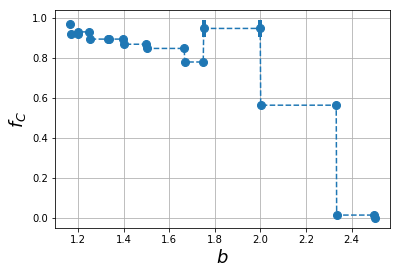

In [47]:
fig, ax = plt.subplots()
ax.errorbar(bs, coop_dens, yerr=err_coop_dens, fmt='o--',  elinewidth=4, ms=8)
ax.grid(True)
ax.set_ylabel(r'$f_C$', fontsize=18)
ax.set_xlabel(r'$b$', fontsize=18)

In [39]:
[b + 1e-3 for b in bs[::2]]

[1.1666666666666667,
 1.2,
 1.25,
 1.3333333333333333,
 1.4,
 1.5,
 1.6666666666666667,
 1.75,
 2.0,
 2.3333333333333335,
 2.5]